In [589]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

El EDA se hace bajo el enfoque de saber que el modelo por excelencia al realizar una recomendacion es la similitud del coseno, y se deduce que las columnas más importantes para el sistema de recomendaciones son “titulo” y “overview”, es esa linea el wordcloud de las palabras, nos dará un mayor contexto.

In [622]:
df_movies=pd.read_csv("../DatosProcesados/movies.csv")

Exploración Inicial:

In [623]:
df_movies.sample(1)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
2152,NaN,0.0,"Fantasy, Comedy, Science Fiction, Romance",20096,en,A clairvoyant woman thinks that she's met her ...,6.825983,Paramount Pictures,United States of America,1991-10-25,0.0,107.0,"English, Français",Released,There's Magic In The Air.,The Butcher's Wife,5.6,35.0,1991,0.0


In [624]:
df_movies.shape

(45376, 20)

Manejo de Valores Faltantes:

In [625]:
df_movies.isna().mean()

belongs_to_collection    0.901093
budget                   0.000000
genres                   0.052539
id                       0.000000
original_language        0.000242
overview                 0.020738
popularity               0.000000
production_companies     0.259961
production_countries     0.136879
release_date             0.000000
revenue                  0.000000
runtime                  0.005421
spoken_languages         0.085750
status                   0.001763
tagline                  0.550467
title                    0.000000
vote_average             0.000000
vote_count               0.000000
release_year             0.000000
return                   0.000000
dtype: float64

In [626]:
df_movies= df_movies.drop(columns=['belongs_to_collection','tagline'])

In [627]:
df_movies=df_movies.dropna(subset=['overview'])
df_movies=df_movies.dropna(subset=['genres'])

In [628]:
df_movies.drop(columns='id').describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.229800e+04,42298.000000,4.229800e+04,42298.000000,42298.00000,42298.000000,42298.000000,4.229800e+04
mean,4.533704e+06,3.110933,1.204101e+07,96.104047,5.71193,117.764599,1991.921533,7.080725e+02
std,1.802412e+07,6.181624,6.661611e+07,35.896199,1.78347,508.452162,24.035472,7.736311e+04
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,0.465993,0.000000e+00,86.000000,5.10000,4.000000,1978.000000,0.000000e+00
50%,0.000000e+00,1.261631,0.000000e+00,95.000000,6.00000,11.000000,2001.000000,0.000000e+00
75%,0.000000e+00,4.127678,0.000000e+00,107.000000,6.80000,38.000000,2011.000000,0.000000e+00
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.00000,14075.000000,2020.000000,1.239638e+07


### Análisis de valores cualitativos

Vizualizar las "wordcloud" generadas con Overview & Titles:

Overview

In [629]:
overviews = ' '.join(df_movies['overview'])

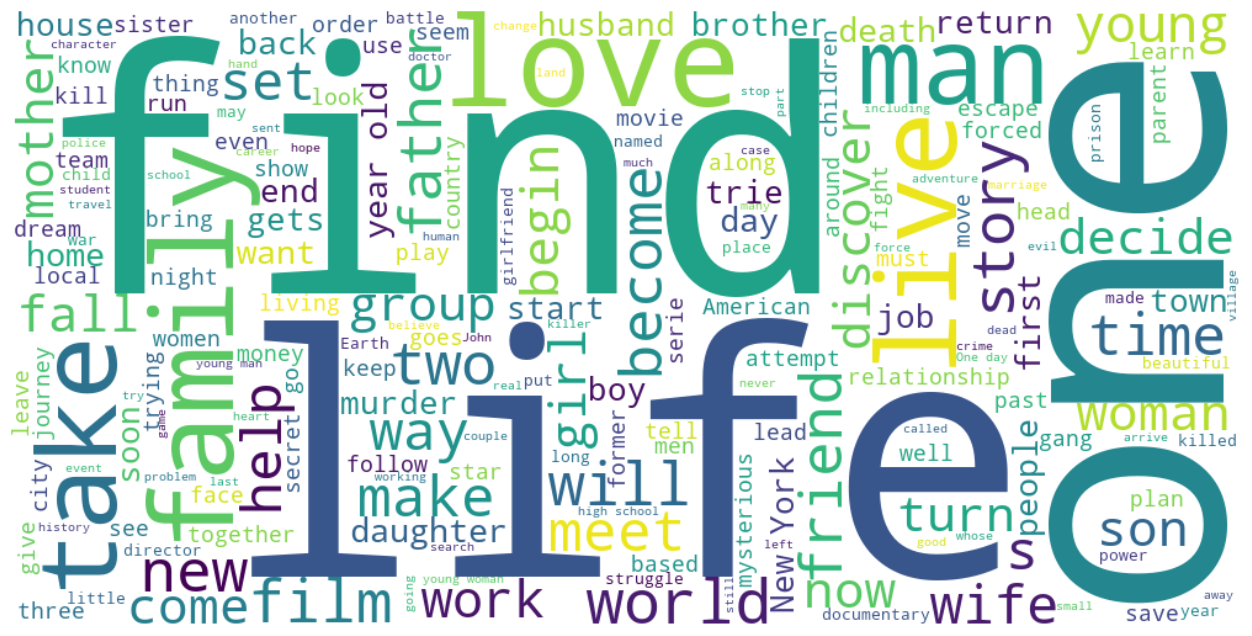

In [630]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS,width=1000, height=500, background_color='white').generate(overviews)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Titles

In [631]:
titles = ' '.join(df_movies['title'])

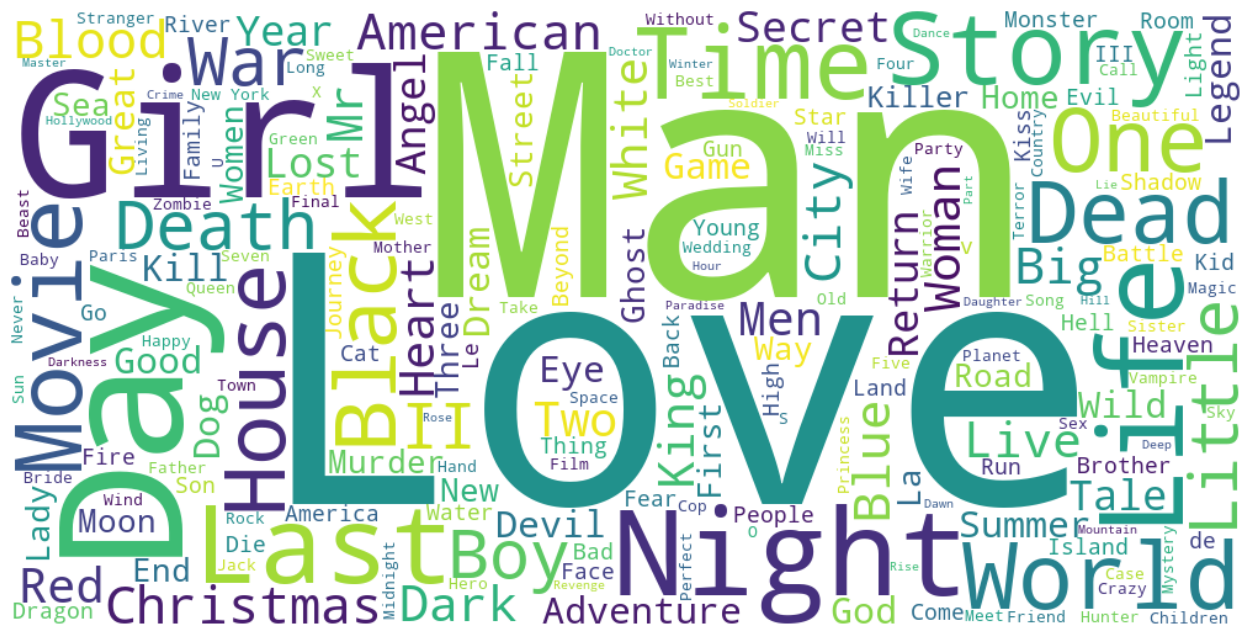

In [632]:
titles_wordcloud = WordCloud(stopwords=STOPWORDS,width=1000, height=500, background_color='white').generate(titles)
plt.figure(figsize=(16,8))
plt.imshow(titles_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Genres

In [633]:
#Eliminar espacios entre los generos
df_movies['genres'] = df_movies['genres'].str.replace(r'\s*,\s*', ',', regex=True)

In [634]:
lista_generos=[]
for i in df_movies['genres']:
    lista_generos.append(i)

In [635]:
generos = set()  # Conjunto para almacenar palabras únicas

for cadena in lista_generos:
    palabras = cadena.split(',')  # Dividir la cadena en palabras
    generos.update(palabras)  #Unicos
generos_list=list(generos)

In [636]:
conteo_por_genero = {genero: 0 for genero in generos_list}

In [637]:
for lista_generos in df_movies['genres']:
    if isinstance(lista_generos, str):
        for genero in lista_generos.split(','):
            conteo_por_genero[genero] += 1

In [638]:
conteo_por_genero = dict(sorted(conteo_por_genero.items(), key=lambda item: item[1],reverse=True))
generos = list(conteo_por_genero.keys())
conteos = list(conteo_por_genero.values())
conteo_por_genero

{'Drama': 20014,
 'Comedy': 12805,
 'Thriller': 7581,
 'Romance': 6671,
 'Action': 6561,
 'Horror': 4657,
 'Crime': 4268,
 'Documentary': 3877,
 'Adventure': 3468,
 'Science Fiction': 3021,
 'Family': 2730,
 'Mystery': 2448,
 'Fantasy': 2290,
 'Animation': 1917,
 'Foreign': 1598,
 'Music': 1588,
 'History': 1378,
 'War': 1310,
 'Western': 1035,
 'TV Movie': 750}

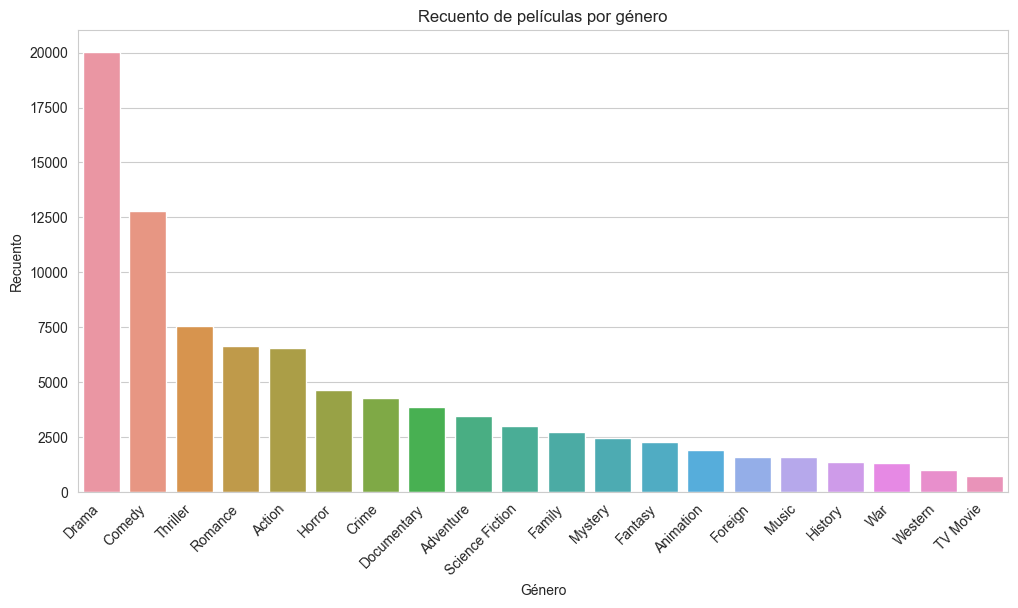

In [639]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=generos, y=conteos, ax=ax)

ax.set_title('Recuento de películas por género')
ax.set_xlabel('Género')
ax.set_ylabel('Recuento')

plt.xticks(rotation=45, ha='right')

plt.show()

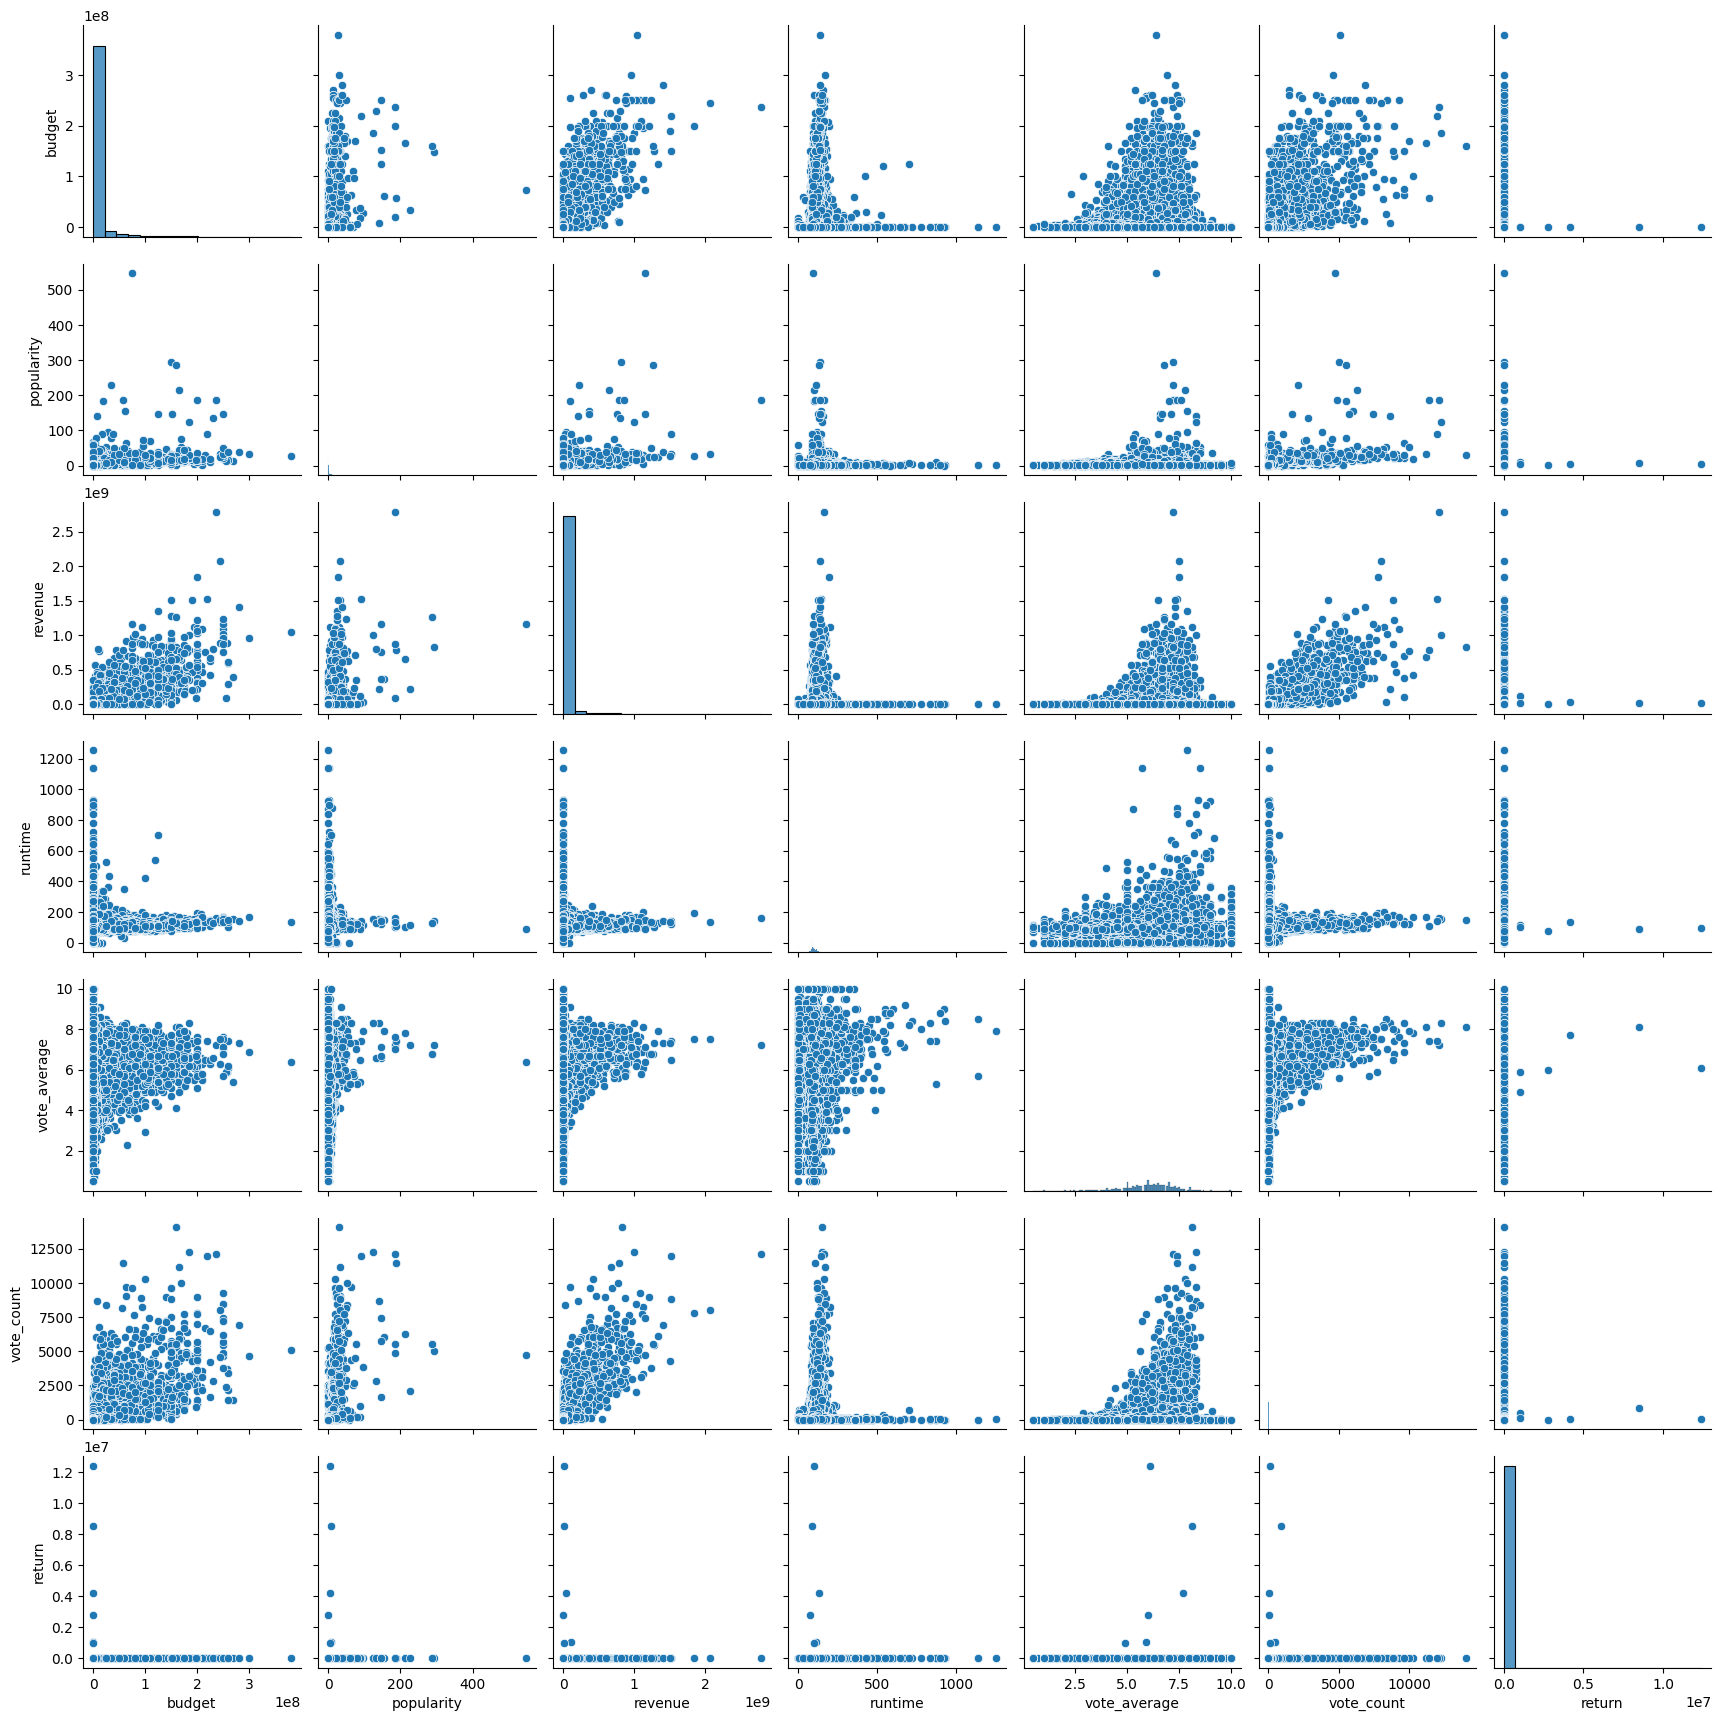

In [225]:
sns.pairplot(data=df_movies.drop(columns=["id","release_year"]))

Análisis Financiero:

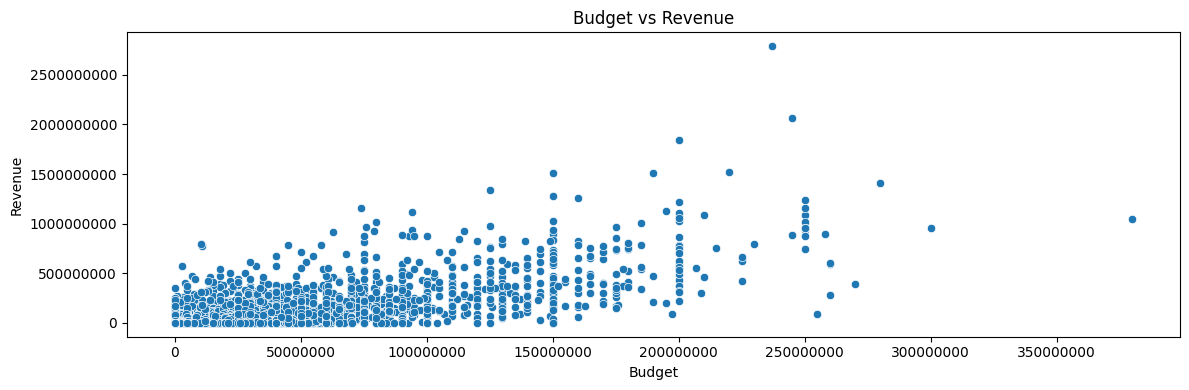

In [232]:
fig = plt.subplots(figsize=(12, 4))

a = sns.scatterplot(x='budget', y='revenue', data=df_movies)
a.set_xlabel("Budget")
a.set_ylabel("Revenue")
a.set_title("Budget vs Revenue")
a.ticklabel_format(style='plain', axis='both')

plt.tight_layout()
plt.show()

In [243]:
#Resulta interesante analizar cuantos valores en 'budget' son igual cero y que han
#tenido ganancías. 
mask_zero_budget = (df_movies['budget'] == 0)
count_zero_budget = mask_zero_budget.sum()
count_zero_budget

36490

Pensando en que la mejor manera de recomendar sería en función de palabras y generos se preocede indagando los campos de overview, title y genres

Genres

In [419]:
df_movies['genres'].isna().sum()

2384

In [454]:
df_movies.shape

(42992, 20)

In [420]:
#Eliminar nulos ya que son pocos datos
df_movies=df_movies.dropna(subset=['genres'])

Vizualizar cuantas peliculas por genero hay:

In [425]:
#Eliminar espacios entre los generos
df_movies['genres'] = df_movies['genres'].str.replace(r'\s*,\s*', ',', regex=True)

In [514]:
lista_generos=[]
for i in df_movies['genres']:
    lista_generos.append(i)

In [515]:
generos = set()  # Conjunto para almacenar palabras únicas

for cadena in lista_generos:
    palabras = cadena.split(',')  # Dividir la cadena en palabras
    generos.update(palabras)  #Unicos
generos_list=list(generos)

In [516]:
conteo_por_genero = {genero: 0 for genero in generos_list}

In [517]:
for lista_generos in df_movies['genres']:
    if isinstance(lista_generos, str):
        for genero in lista_generos.split(','):
            conteo_por_genero[genero] += 1

In [518]:
conteo_por_genero = dict(sorted(conteo_por_genero.items(), key=lambda item: item[1],reverse=True))
conteo_por_genero

{'Drama': 20255,
 'Comedy': 13181,
 'Thriller': 7619,
 'Romance': 6733,
 'Action': 6592,
 'Horror': 4670,
 'Crime': 4305,
 'Documentary': 3921,
 'Adventure': 3494,
 'Science Fiction': 3042,
 'Family': 2768,
 'Mystery': 2464,
 'Fantasy': 2313,
 'Animation': 1932,
 'Foreign': 1621,
 'Music': 1598,
 'History': 1397,
 'War': 1323,
 'Western': 1042,
 'TV Movie': 766}

In [519]:
generos = list(conteo_por_genero.keys())
conteos = list(conteo_por_genero.values())

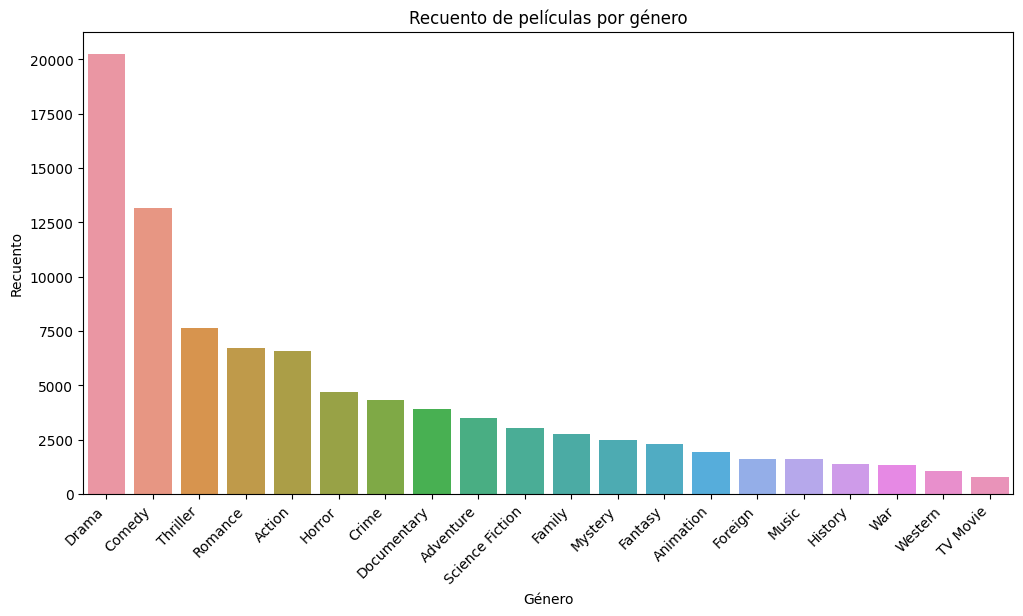

In [520]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=generos, y=conteos, ax=ax)

ax.set_title('Recuento de películas por género')
ax.set_xlabel('Género')
ax.set_ylabel('Recuento')

plt.xticks(rotation=45, ha='right')

plt.show()


In [ ]:
sns.barplot(x=freq_genres.index, y=freq_genres.values, ax=ax[0], palette='viridis')
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Amount of films')
ax[0].set_title('Films by genre')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

#### Anális de las peliculas y las fechas de lanzamientos.

<Axes: xlabel='release_year'>

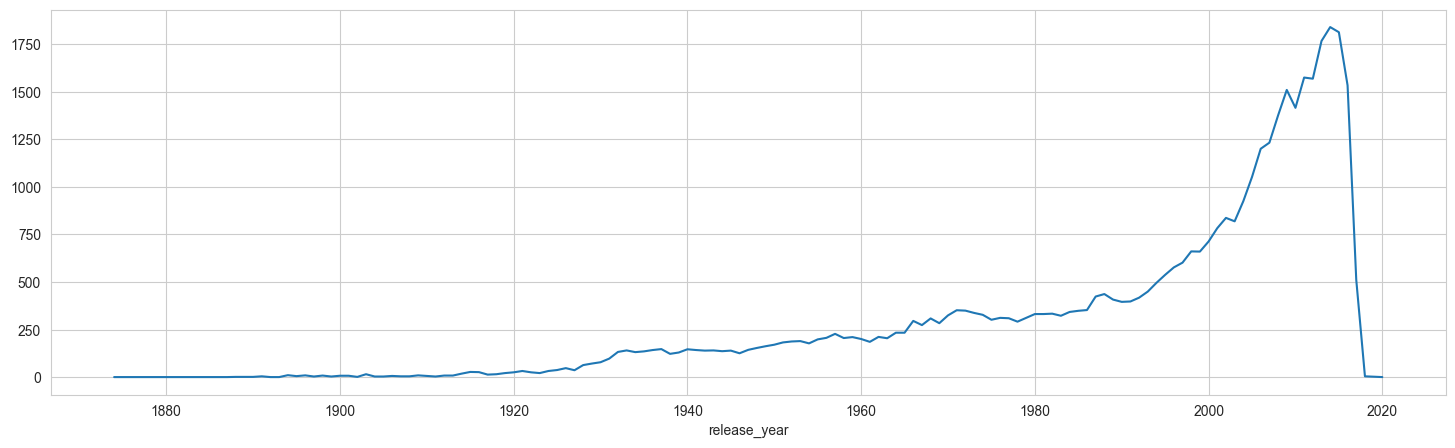

In [588]:
years = df_movies.groupby('release_year')['title'].count()
plt.figure(figsize=(18,5))
years.plot()

In [551]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies['Mes'] = df_movies['release_date'].dt.month
df_movies['Día'] = df_movies['release_date'].dt.day_of_week

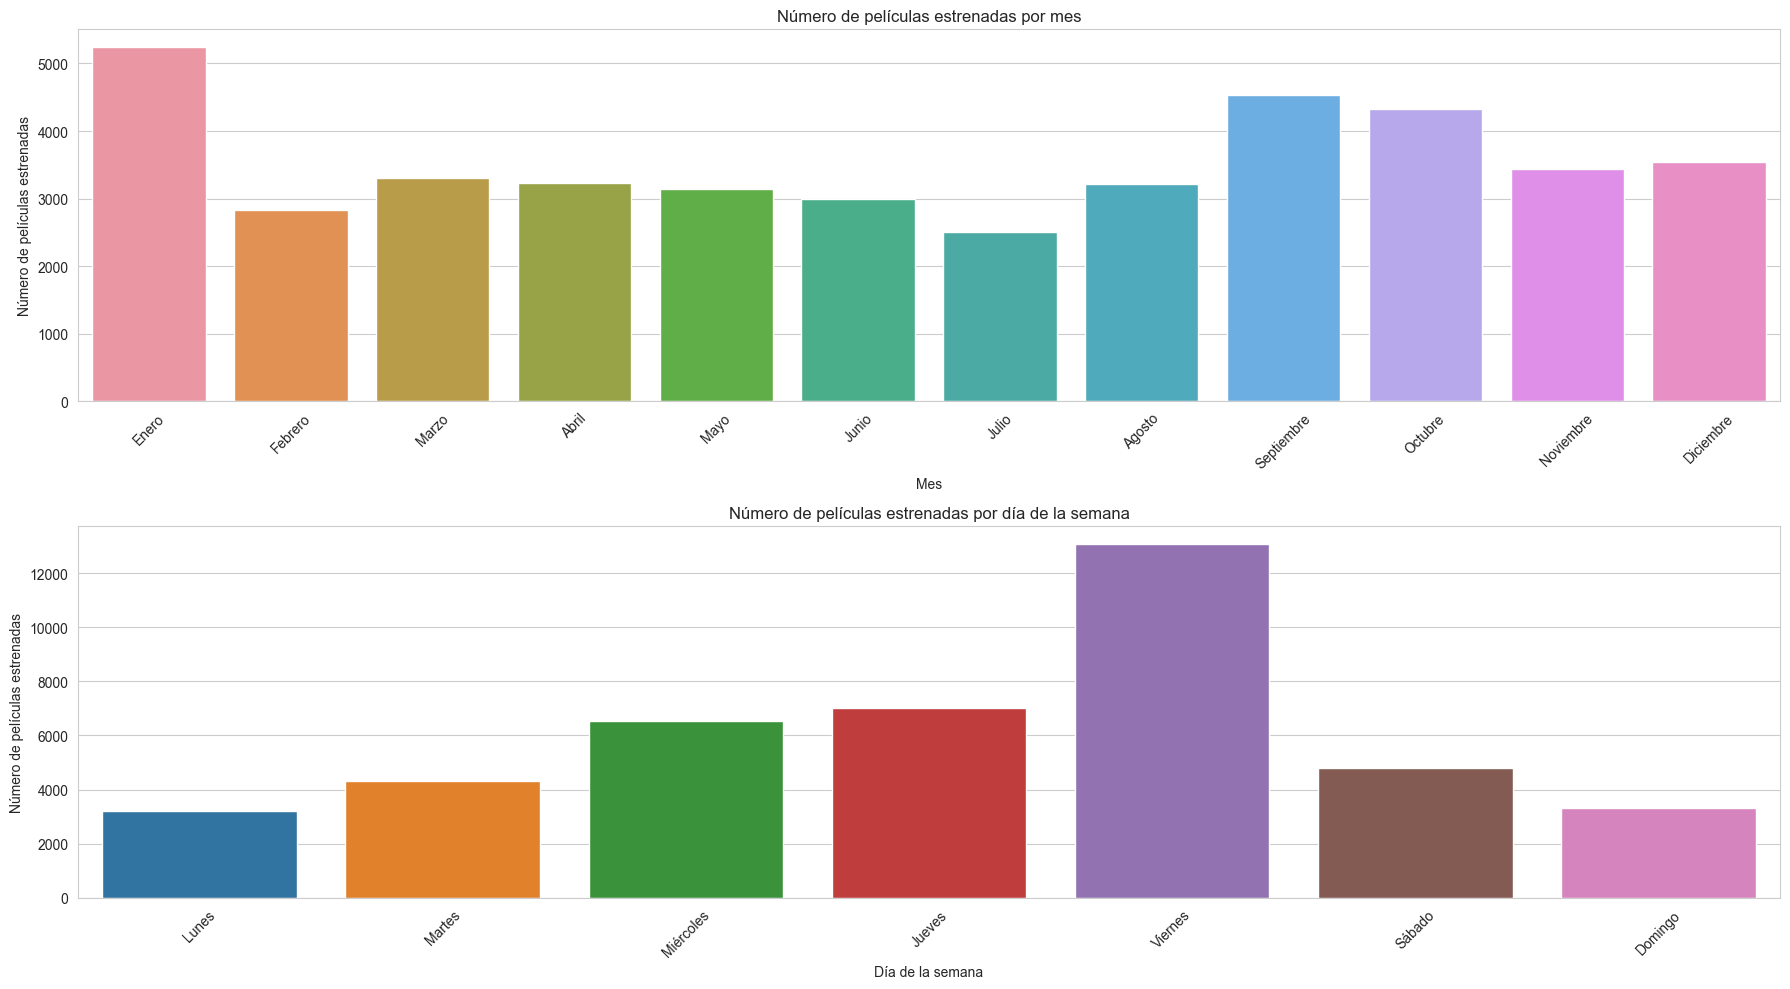

In [583]:
conteo_por_mes = df_movies['Mes'].value_counts().sort_index()
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
conteo_por_dia = df_movies['Día'].value_counts().sort_index()
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

fig, ax = plt.subplots(2, 1, figsize=(18, 10), sharey=False)

sns.barplot(x=nombres_meses, y=conteo_por_mes, ax=ax[0] )
ax[0].set_xlabel('Mes')
ax[0].set_ylabel('Número de películas estrenadas')
ax[0].set_title('Número de películas estrenadas por mes')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(x=dias_semana, y=conteo_por_dia, ax=ax[1])
ax[1].set_xlabel('Día de la semana')
ax[1].set_ylabel('Número de películas estrenadas')
ax[1].set_title('Número de películas estrenadas por día de la semana')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()